# Examen Parcial 2
### Usar los métodos de ML no supervisado (k-means, Gaussian mixture, cluster jerárquico)
#### Estela Gil Villegas Guevara

In [48]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

### 1. Utilizar el método de codo para determinar el número de cluster óptimo (dataset coactivation matrix)

In [49]:
file_path = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\SEXTO SEMESTRE\modelos II python\Neurociencias-2025-2\S03_datasets\coactivation_matrix\Coactivation_matrix.mat"
mat_data = loadmat(file_path)
# print(mat_data.keys())  

In [50]:
coactivation_matrix = mat_data['Coactivation_matrix'] 
scaler = StandardScaler()
X_std = scaler.fit_transform(coactivation_matrix)
column_names = [f'Feature_{i+1}' for i in range(coactivation_matrix.shape[1])]  
df_std = pd.DataFrame(data=X_std, columns=column_names)

In [51]:
inertia = []
clusters = range(1, 11)  

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

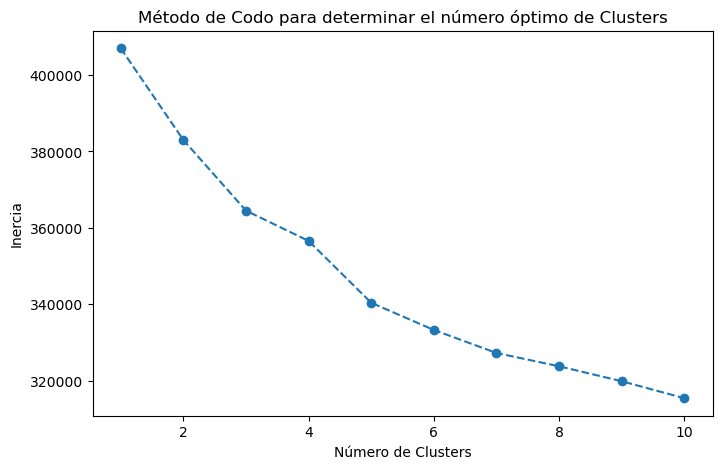

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método de Codo para determinar el número óptimo de Clusters')
plt.savefig('grafico_metodo_codo.png')
plt.show()

### 2. Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en el dataset

KMeans

In [53]:
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)
df_std['kmeans'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

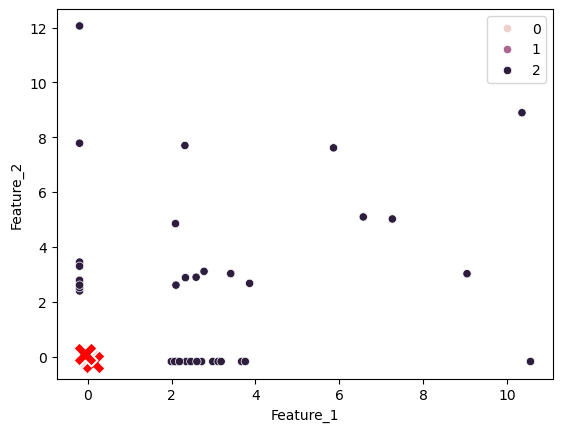

In [54]:
sns.scatterplot(data=df_std, x='Feature_1', y='Feature_2', hue='kmeans')
sns.scatterplot(x=kmeans.cluster_centers_[:, 3], y=kmeans.cluster_centers_[:, 0], 
                marker="X", color='r', s=300)

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

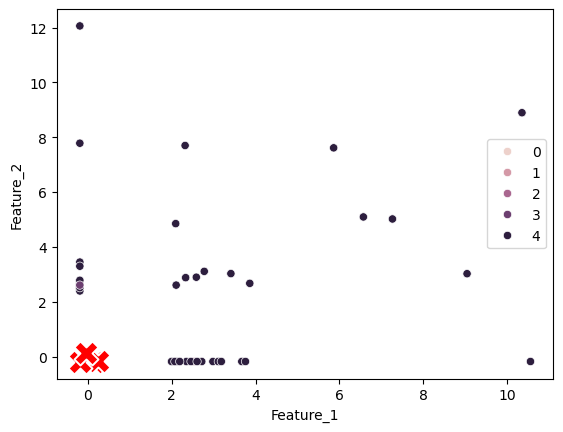

In [55]:
no_clusters = 5
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)
df_std['kmeans'] = kmeans_labels

sns.scatterplot(data=df_std, x='Feature_1', y='Feature_2', hue='kmeans')
sns.scatterplot(x=kmeans.cluster_centers_[:, 3], y=kmeans.cluster_centers_[:, 0], 
                marker="X", color='r', s=300)

Gaussian Mixture Model

In [56]:
from sklearn.mixture import GaussianMixture

num_clusters = 3  
gm = GaussianMixture(n_components=num_clusters, random_state=42).fit(X_std)

In [57]:
labels = gm.predict(X_std) # predigo las etiquetas de los clutsters
df_std['modelo Gaussiano'] = labels # agrego etiquetas al df

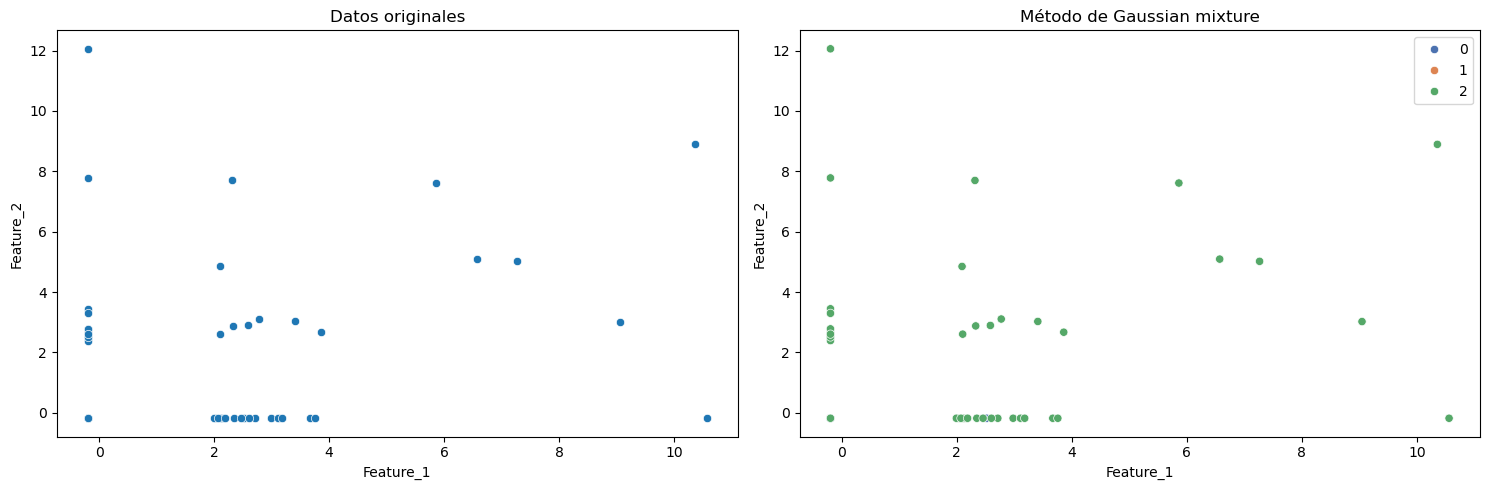

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # gráfico comparación de datos

sns.scatterplot(data=df_std, x='Feature_1', y='Feature_2', ax=axes[0]).set_title('Datos originales') # plot datos originales
sns.scatterplot(data=df_std, x='Feature_1', y='Feature_2', hue=labels, palette='deep', ax=axes[1]).set_title('Método de Gaussian mixture') # plot datos GMM

plt.tight_layout()
plt.show()

### 3. Utilizar el método de codo para determinar el número de clusters óptimo (dataset brain tumor)

In [59]:
file_bt_path = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\SEXTO SEMESTRE\modelos II python\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"
df_bt = pd.read_csv(file_bt_path)
print(df_bt.head())

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [60]:
features = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 
            'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 
            'Dissimilarity', 'Correlation', 'Coarseness']
X = df_bt[features]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [61]:
clusters = range(1, 11)
inertia = []

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

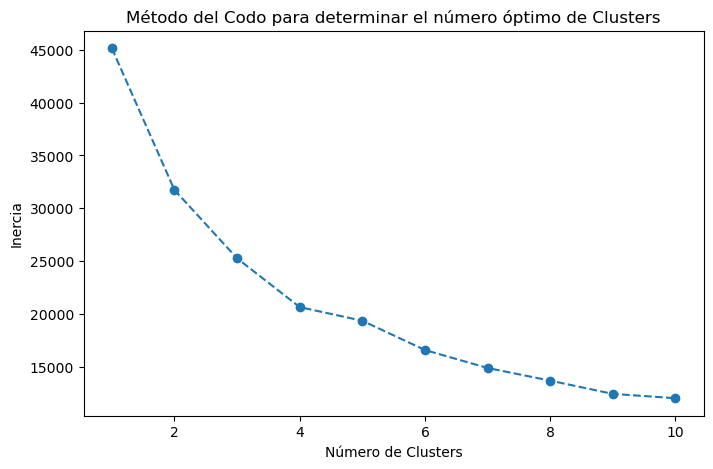

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de Clusters')
plt.show()

### 4. Utilizar 2 clusters con cada método (k-means, gaussian clusters & cluster jerárquico) y calcular la matriz de confusión, usando la columna 'Class' como ground truth

KMeans

In [63]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

GMM

In [64]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_std)

Clustering Jerárquico

In [65]:
from scipy.cluster.hierarchy import linkage, fcluster

hierarchical = linkage(X_std, method='ward')
hierarchical_labels = fcluster(hierarchical, t=2, criterion='maxclust')
hierarchical_labels = hierarchical_labels - 1

Matriz de confusión

In [66]:
true_labels = ['Clase 0', 'Clase 1']  # etiquetas reales
predicted_labels = ['Cluster 0', 'Cluster 1']  # etiquetas de clusters

cm_kmeans = pd.DataFrame(confusion_matrix(df_bt['Class'], kmeans_labels), 
                         index=true_labels, columns=predicted_labels)

cm_gauss = pd.DataFrame(confusion_matrix(df_bt['Class'], gmm_labels), 
                        index=true_labels, columns=predicted_labels)

cm_hierarchical = pd.DataFrame(confusion_matrix(df_bt['Class'], hierarchical_labels), 
                               index=true_labels, columns=predicted_labels)

In [67]:
print(cm_kmeans)
print(cm_gauss)
print(cm_hierarchical)

         Cluster 0  Cluster 1
Clase 0       1978        101
Clase 1         80       1603
         Cluster 0  Cluster 1
Clase 0       2056         23
Clase 1         60       1623
         Cluster 0  Cluster 1
Clase 0       2053         26
Clase 1         94       1589


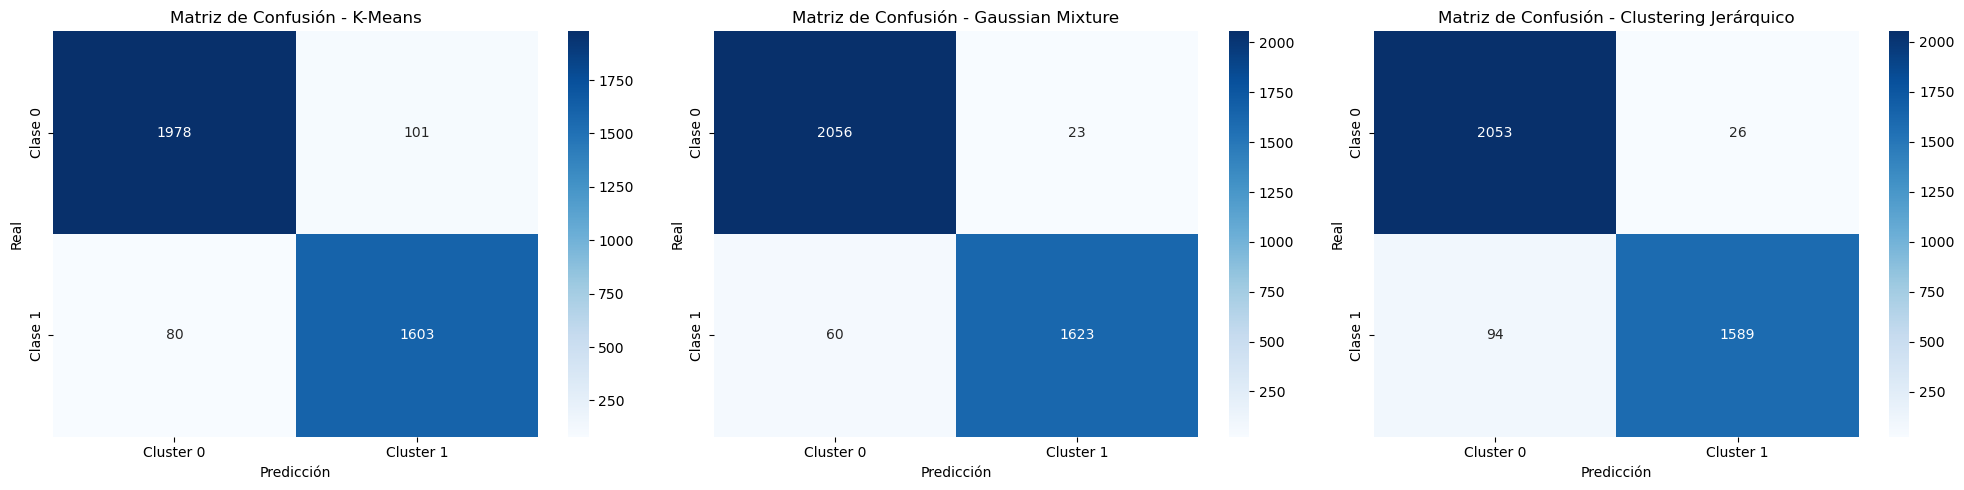

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Clase 0", "Clase 1"], ax=axes[0]).set_title("Matriz de Confusión - K-Means")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Clase 0", "Clase 1"], ax=axes[1]).set_title("Matriz de Confusión - Gaussian Mixture")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

sns.heatmap(cm_hierarchical, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Clase 0", "Clase 1"], ax=axes[2]).set_title("Matriz de Confusión - Clustering Jerárquico")
axes[2].set_xlabel("Predicción")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()

### 5. ¿Qué método recomendarías para este dataset? ¿Por qué?

Yo recomendaría usar Gaussian Mixture, ya que tiene la mayor precisión entre los métodos evaluados. Solo 23 elementos de la clase 0, y 60 elementos de la Clase 1, estuvieron mal clasificados, a comparación de los del clustering jerárquico (26 elementos de clase 0 y 94 de la Clase 1 mal clasificados), y los del k-means (101 errores en Clase 0 y 80 en Clase 1).

### 6. ¿Cómo se relacionan las definiciones de accuracy, recall, exactitud y f1-score, a la matriz de confusión?

La matriz de confusión nos da los elementos necesarios para calcular esas métricas. 
- La *precisión* mide cuántos de los datos clasificados como positivos, realmente lo son. Se calcula con los valores True Positive (TP) y False Positive (FP). Los TP son los valores en la diagonal principal, para la clase positiva (en este caso, los datos de clase 1 que son correctamente clasificados como cluster 1. Los FP son los valores que se encuentran fuera de la diagonal, donde datos de la clase 0 (negativa) se clasificaron como positivos (Cluster 1).
- La *exactitud* mide la proporción de todas las predicciones (positivas y negativas), que resultan correctas. Los TP y TN se encuentran en la diagonal principal de la matriz => son los valores correctamente clasificados en ambas clases.
- *Recall*: mide qué proporción de los datos realmente positivos fueron correctamente clasificados como positivos; los TP son los mismos que en la precisión, y los FN (falsos negativos) son datos de la clase 1 (positivos) que fueron mal clasificados como parte del cluster 0 (negativos)
- *F1-Score*: combina la precisión y el recall en una sola medida, y es especialmente útil en escenarios en los que las clases se encuentran desbalanceadas (hay mayor proporción de elementos positivos que negativos).

### 7. A partir del resultado del punto 4, calcular las cuatro medidas 

In [69]:
def calcular_metricas(matriz_conf):
    
    TP = matriz_conf[1, 1]  # clase 1 correctamente clasificada
    TN = matriz_conf[0, 0]  # clase 0 correctamente clasificada
    FP = matriz_conf[0, 1]  # clase 0 mal clasificada como clase 1
    FN = matriz_conf[1, 0]  # clase 1 mal clasificada como clase 0
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'Precisión': precision,
        'Exactitud': exactitud,
        'Recuperación': recall,
        'F1-Score': f1_score
    }

In [70]:
import pandas as pd

metricas_kmeans = calcular_metricas(confusion_matrix(df_bt['Class'], kmeans_labels))
metricas_gmm = calcular_metricas(confusion_matrix(df_bt['Class'], gmm_labels))
metricas_jerarquico = calcular_metricas(confusion_matrix(df_bt['Class'], hierarchical_labels))

tabla_metricas = pd.DataFrame({
    "Métrica": ["Precisión", "Exactitud", "Recuperación", "F1-Score"],
    "K-Means": [round(value, 4) for value in metricas_kmeans.values()],
    "Gaussian Mixture": [round(value, 4) for value in metricas_gmm.values()],
    "Clustering Jerárquico": [round(value, 4) for value in metricas_jerarquico.values()]
})

print(tabla_metricas)

        Métrica  K-Means  Gaussian Mixture  Clustering Jerárquico
0     Precisión   0.9407            0.9860                 0.9839
1     Exactitud   0.9519            0.9779                 0.9681
2  Recuperación   0.9525            0.9643                 0.9441
3      F1-Score   0.9466            0.9751                 0.9636


Con los resultados de la tabla podemos observar que efectivamente el GMM presenta mejores resultados en todas las medidas, lo cual reitera que sería el mejor modelo a usar para estos datos :)